# KNN

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
import numpy as np

# Define the two vectors
vector1 = np.array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1])
vector2 = np.array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0])

# Calculate the Euclidean distance
euclidean_distance = np.linalg.norm(vector1 - vector2)
euclidean_distance


np.float64(2.0)

In [4]:
vectorizer = {
    "and": 0,
    "bad": 0,
    "boring": 0,
    "excellent": 0,
    "good": 0,
    "is": 0,
    "movie": 0,
    "plot": 0,
    "poor": 0,
    "the": 0,
    "this": 0,
    "very": 0,
}

In [5]:
def convert_text_to_vector(text):
    words = text.split(" ")
    vector = vectorizer.copy()
    for word in words:
        if word in vector:
            vector[word] = 1
    return np.array(list(vector.values()))

text1 = "movie is very bad"
vector1 = convert_text_to_vector(text1)
vector1

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1])

In [6]:
ls_txt = ["a very good movie", "this movie is excellent", "very good and excellent"]
for txt in ls_txt:
    vector2 = convert_text_to_vector(txt)
    euclidean_distance = np.linalg.norm(vector1 - vector2)
    print(f"{txt}: {euclidean_distance}")

a very good movie: 1.7320508075688772
this movie is excellent: 2.0
very good and excellent: 2.449489742783178


In [7]:
ls_txt = ["poor and bad movie", "poor and boring plot", "bad and boring movie"]
for txt in ls_txt:
    vector2 = convert_text_to_vector(txt)
    euclidean_distance = np.linalg.norm(vector1 - vector2)
    print(f"{txt}: {euclidean_distance}")

poor and bad movie: 2.0
poor and boring plot: 2.8284271247461903
bad and boring movie: 2.0


In [8]:
ls_txt = ["this movie is excellent", "a very good movie", "the movie is bad"]
for txt in ls_txt:
    vector2 = convert_text_to_vector(txt)
    euclidean_distance = np.linalg.norm(vector1 - vector2)
    print(f"{txt}: {euclidean_distance}")

this movie is excellent: 2.0
a very good movie: 1.7320508075688772
the movie is bad: 1.4142135623730951


In [9]:
ls_txt = ["poor and boring plot", "the movie is bad", "poor and bad movie"]
for txt in ls_txt:
    vector2 = convert_text_to_vector(txt)
    euclidean_distance = np.linalg.norm(vector1 - vector2)
    print(f"{txt}: {euclidean_distance}")

poor and boring plot: 2.8284271247461903
the movie is bad: 1.4142135623730951
poor and bad movie: 2.0


In [10]:
# Câu hỏi: Nếu sử dụng KNN với K = 5, với đầu vào là "movie is very bad" 
# thì KNN sẽ cho kết quả phân loại nhãn cho câu này là gì?

ls_txt = [
    "a very good movie",
    "this movie is excellent",
    "very good and excellent",
    "the movie is bad",
    "poor and boring plot",
    "bad and boring movie",
]

for txt in ls_txt:
    vector2 = convert_text_to_vector(txt)
    euclidean_distance = np.linalg.norm(vector1 - vector2)
    print(f"{txt}: {euclidean_distance}")

a very good movie: 1.7320508075688772
this movie is excellent: 2.0
very good and excellent: 2.449489742783178
the movie is bad: 1.4142135623730951
poor and boring plot: 2.8284271247461903
bad and boring movie: 2.0


In [11]:
# Định nghĩa trước bài toán
# Trong Iteration đầu tiên: Cho trước tâm cụm là 2 tâm cụm ngẫu nhiên:

# - C1 [1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1]: very good and excellent  
# - C2 [0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]: the movie is bad


# Câu hỏi: Khoảng cách Euclidean của tâm C1 tới các sample 0, 1, 4, 5 (làm tròn tới 3 chữ số thập phân) lần lượt là?

ls_txt = [
    "a very good movie",
    "this movie is excellent",
    "very good and excellent",
    "the movie is bad",
    "poor and boring plot",
    "bad and boring movie",
]

C1 = [1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1]
for txt in ls_txt:
    vector2 = convert_text_to_vector(txt)
    euclidean_distance = np.linalg.norm(C1 - vector2)
    print(f"{txt}: {euclidean_distance}")

a very good movie: 1.7320508075688772
this movie is excellent: 2.449489742783178
very good and excellent: 0.0
the movie is bad: 2.8284271247461903
poor and boring plot: 2.449489742783178
bad and boring movie: 2.449489742783178


In [12]:
C2 = [0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
for txt in ls_txt:
    vector2 = convert_text_to_vector(txt)
    euclidean_distance = np.linalg.norm(C2 - vector2)
    print(f"{txt}: {euclidean_distance}")

a very good movie: 2.23606797749979
this movie is excellent: 2.0
very good and excellent: 2.8284271247461903
the movie is bad: 0.0
poor and boring plot: 2.8284271247461903
bad and boring movie: 2.0


In [ ]:
# Câu hỏi: Xác định các điểm dữ liệu thuộc cụm 1 và cụm 2:
# Vector biểu diễn phân cụm của bộ data X là?

# Ví dụ:
# Nếu câu đầu tiên thuộc cụm C1, câu thứ 2 thuộc cụm C2 thì vector biểu diễn phân cụm sẽ là
# [C1, C2, C1, C1, C1, C2]


In [13]:
# Iteration thứ 2
# Câu hỏi: Cập nhật tọa độ của tâm cụm C1 và C2 dựa trên các câu được gán cho mỗi tâm cụm, tâm cụm C1 và C2 mới là:
# (Chọn đáp án gần bằng, làm tròn 1 chữ số thập phân)

C1 = [1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1]
C2 = [0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
cluster1 = []
cluster2 = []
for txt in ls_txt:
    vector2 = convert_text_to_vector(txt)
    euclidean_distance_C1 = np.linalg.norm(C1 - vector2)
    euclidean_distance_C2 = np.linalg.norm(C2 - vector2)
    if euclidean_distance_C1 < euclidean_distance_C2:
        cluster1.append(vector2)
    else:
        cluster2.append(vector2)


In [16]:
cluster1 = np.array(cluster1)
cluster2 = np.array(cluster2)

C1 = np.mean(cluster1, axis=0)
C2 = np.mean(cluster2, axis=0)

# round to 1 decimal
C1 = np.round(C1, 1)
C2 = np.round(C2, 1)

print(C1)
print(C2)

[0.7 0.  0.3 0.3 0.7 0.  0.3 0.3 0.3 0.  0.  0.7]
[0.3 0.7 0.3 0.3 0.  0.7 1.  0.  0.  0.3 0.3 0. ]


In [17]:
# Câu hỏi: Xác định các điểm dữ liệu thuộc cụm 1 và cụm 2 sau khi cập nhật tâm cụm theo dạng vector biểu diễn.
clusters = []
for txt in ls_txt:
    vector2 = convert_text_to_vector(txt)
    euclidean_distance_C1 = np.linalg.norm(C1 - vector2)
    euclidean_distance_C2 = np.linalg.norm(C2 - vector2)
    if euclidean_distance_C1 < euclidean_distance_C2:
        clusters.append("C1")
    else:
        clusters.append("C2")

print(clusters)

['C1', 'C2', 'C1', 'C2', 'C1', 'C2']


# Decision tree

In [18]:
data_train = [    
    ["Sunny","Hot","High","Weak","No"],
    ["Sunny","Hot","High","Strong","No"],
    ["Overcast","Hot","High","Weak","Yes"],
    ["Rain","Mild","High","Weak","Yes"],
    ["Rain","Cool","Normal","Weak","Yes"],
    ["Rain","Cool","Normal","Strong","No"],
    ["Overcast","Cool","Normal","Strong","Yes"],
    ["Sunny","Mild","High","Weak","No"],
    ["Sunny","Cool","Normal","Weak","Yes"],
    ["Rain","Mild","Normal","Weak","Yes"],
]
cols = ["Outlook","Temperature","Humidity","Wind","PlayTennis"]
df_train = pd.DataFrame(data_train, columns=cols)
df_train

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [19]:
data = [
    ["Sunny","Mild","Normal","Strong","Yes"],
    ["Overcast","Mild","High","Strong","Yes"],
    ["Overcast","Hot","Normal","Weak","Yes"],
    ["Rain","Mild","High","Strong","No"],
]
df_test = pd.DataFrame(data, columns=cols)
df_test

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Mild,Normal,Strong,Yes
1,Overcast,Mild,High,Strong,Yes
2,Overcast,Hot,Normal,Weak,Yes
3,Rain,Mild,High,Strong,No


In [20]:
def calculate_entropy(labels):
    """
    Calculate the entropy for a set of labels.

    Args:
        labels (array-like): Array of labels.

    Returns:
        float: Entropy score.
    """
    # Count the frequency of each unique label
    unique, counts = np.unique(labels, return_counts=True)
    # Calculate the probability of each class
    probabilities = counts / counts.sum()
    # Calculate entropy, ignoring zero probabilities to avoid log(0)
    entropy = -np.sum(
        probabilities * np.log2(probabilities, where=(probabilities != 0))
    )
    return entropy

In [21]:
calculate_entropy(df_train["PlayTennis"])

np.float64(0.9709505944546686)

In [22]:
def calculate_entropy_score(feature_array, label_array):
    """
    Calculate the entropy score for a dataset given features and labels.

    Args:
        feature_array (array-like): 2D array where each row is a data point and each column is a feature.
        label_array (array-like): 1D array of labels corresponding to the data points.

    Returns:
        list of float: Entropy scores for each feature.
    """
    entropy_scores = []

    for feature in range(feature_array.shape[1]):
        # Get unique values of the feature
        unique_values = np.unique(feature_array[:, feature])
        entropy_feature = 0

        for value in unique_values:
            # Get indices where feature value is equal to the unique value
            indices = np.where(feature_array[:, feature] == value)
            # Get corresponding labels
            subset_labels = label_array[indices]
            # Calculate entropy for the subset
            entropy_value = calculate_entropy(subset_labels)
            # Calculate weighted entropy for the feature
            weight = len(subset_labels) / len(label_array)
            entropy_feature += weight * entropy_value

        entropy_scores.append(entropy_feature)

    return entropy_scores

In [23]:
calculate_entropy_score(
    df_train[["Temperature"]].values, df_train["PlayTennis"].values
)

[np.float64(0.8754887502163469)]

In [24]:
# calculate information gain of each feature
def calculate_information_gain(feature_array, label_array):
    """
    Calculate the information gain for a dataset given features and labels.

    Args:
        feature_array (array-like): 2D array where each row is a data point and each column is a feature.
        label_array (array-like): 1D array of labels corresponding to the data points.

    Returns:
        list of float: Information gain for each feature.
    """
    # Calculate the entropy of the entire dataset
    entropy_full = calculate_entropy(label_array)
    # Calculate the entropy of each feature
    entropy_features = calculate_entropy_score(feature_array, label_array)
    # Calculate information gain
    information_gain = entropy_full - np.array(entropy_features)
    return information_gain

In [28]:
ls_feat = ["Outlook", "Temperature", "Humidity", "Wind"]
for feat in ls_feat:
    ig = calculate_information_gain(df_train[[feat]].values, df_train["PlayTennis"].values)
    print(f"{feat}: {ig}")

Outlook: [0.32192809]
Temperature: [0.09546184]
Humidity: [0.12451125]
Wind: [0.09127745]


In [33]:
# Câu hỏi: Cây quyết định hoàn chỉnh sẽ có bao nhiêu lá?
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder

In [34]:
# Initialize OneHotEncoder
encoder = OneHotEncoder()

# Encode categorical features
X_train_encoded = encoder.fit_transform(df_train[["Outlook", "Temperature", "Humidity", "Wind"]])

# Train the model
dt_classifier = DecisionTreeClassifier()
y_train = df_train["PlayTennis"]
dt_classifier.fit(X_train_encoded, y_train)

# Show the number of leaf nodes
dt_classifier.get_n_leaves()


np.int64(5)

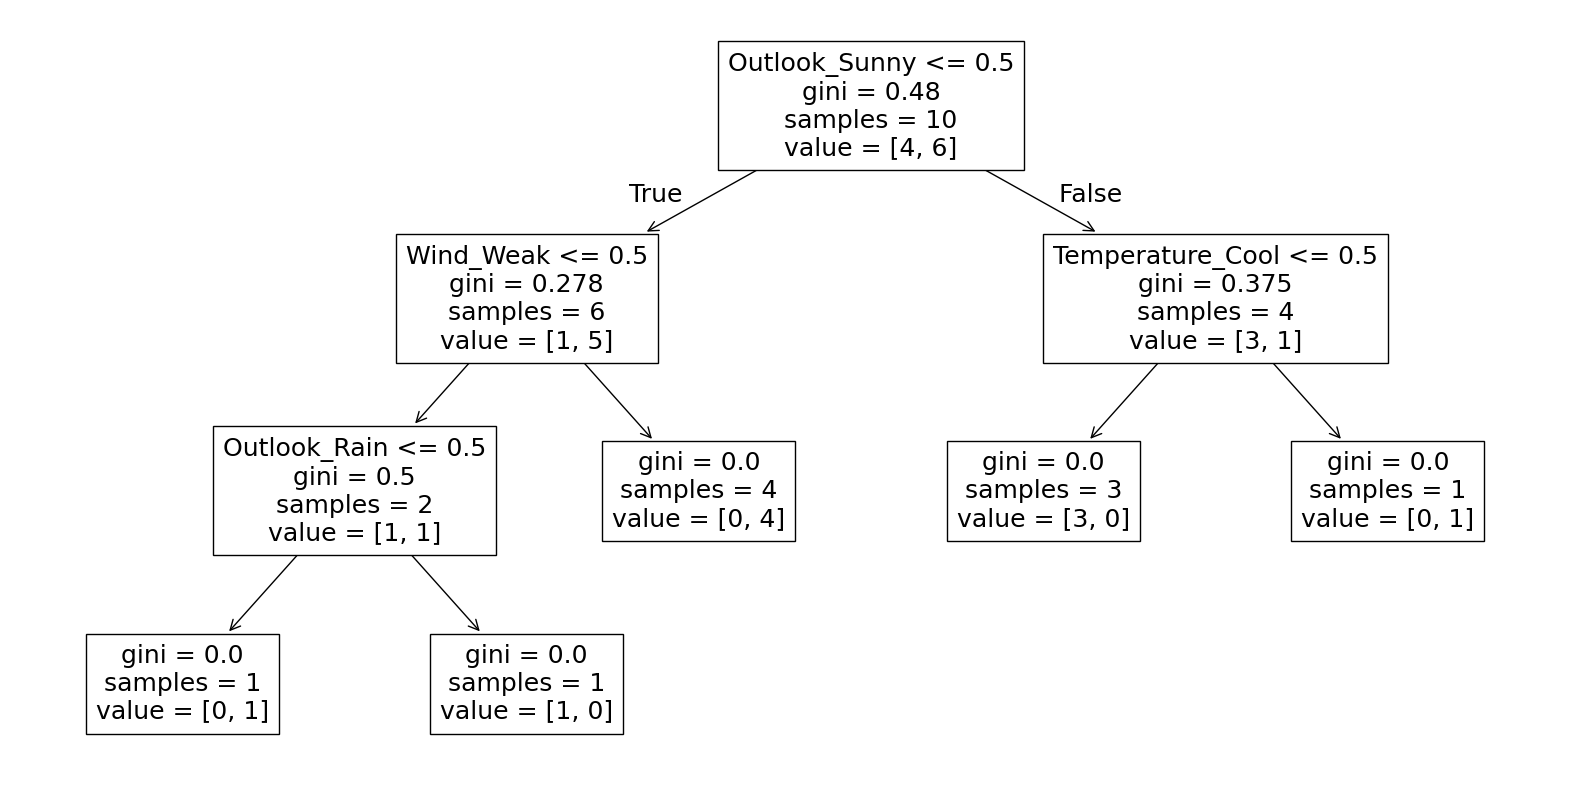

In [35]:
# show the tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, feature_names=encoder.get_feature_names_out(["Outlook", "Temperature", "Humidity", "Wind"]))
plt.show()

In [36]:
# Câu hỏi: Dùng cây quyết định đã xây dựng trên dữ liệu huấn luyện, 
# dự đoán kết quả của dòng dữ liệu cuối cùng trong tập kiểm tra.
# Preidct and evaluate
y_pred = dt_classifier.predict(encoder.transform(df_test[["Outlook", "Temperature", "Humidity", "Wind"]]))
y_pred

array(['No', 'Yes', 'Yes', 'No'], dtype=object)

In [38]:
# accuracy
from sklearn.metrics import accuracy_score

accuracy_score(df_test["PlayTennis"], y_pred)

0.75

# Ensemble

In [ ]:
# Bước 6: Tạo N bootstrapped dataset từ dữ liệu gốc (lấy ngẫu nhiên dữ liệu có lặp lại).
# Bước 5: Chọn ngẫu nhiên một số feature (ví dụ 2 feature) từ dataset cho mỗi lần chia nhánh trong cây.
# Bước 4: Xây dựng một cây quyết định cho mỗi bootstrapped dataset.
# Bước 1: Tính entropy hoặc Gini để chọn feature tốt nhất.
# Bước 3: Loại bỏ feature đã được chọn ra khỏi bảng dữ liệu để tránh chọn lại.
# Bước 2: Lặp lại quá trình cho đến khi không còn feature nào hoặc đạt điều kiện dừng.

In [3]:
dataset_path = "data/employee_data.csv"
df = pd.read_csv(dataset_path)
df.head()

,ID,Gender,Experience (Years),Position,Salary
0,1,F,4,DevOps Engineer,109976
1,2,M,6,DevOps Engineer,120088
2,3,M,17,Web Developer,181301
3,4,M,7,Systems Administrator,77530
4,5,F,13,Systems Administrator,152397


In [4]:
# label encoding for Gender and Position
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender_encoded'] = le.fit_transform(df['Gender'])
df['Position_encoded'] = le.fit_transform(df['Position'])
df.head()

,ID,Gender,Experience (Years),Position,Salary,Gender_encoded,Position_encoded
0,1,F,4,DevOps Engineer,109976,0,2
1,2,M,6,DevOps Engineer,120088,1,2
2,3,M,17,Web Developer,181301,1,10
3,4,M,7,Systems Administrator,77530,1,8
4,5,F,13,Systems Administrator,152397,0,8


In [5]:
X = df[["Gender_encoded", "Experience (Years)", "Position_encoded"]]
y = df["Salary"]

# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# 
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=50, random_state=42)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [18]:
# calculate mean_squared_error and r2_score
from sklearn.metrics import mean_squared_error, r2_score

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2: {r2}")

Mean Squared Error: 827087272.7854073
R^2: 0.5572421510566792


In [44]:
ls_n_estimators = [10, 20, 50, 100]
for n in ls_n_estimators:
    regressor = RandomForestRegressor(n_estimators=n, random_state=42)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"n_estimators={n}: Mean Squared Error: {mse}, R^2: {r2}")

n_estimators=10: Mean Squared Error: 816412296.1290023, R^2: 0.5629566987923645
n_estimators=20: Mean Squared Error: 808325351.4423139, R^2: 0.5672858165914372
n_estimators=50: Mean Squared Error: 827087272.7854073, R^2: 0.5572421510566792
n_estimators=100: Mean Squared Error: 833009696.90978, R^2: 0.5540717483046136


In [45]:
ls_max_depth = list(range(1, 11))
for d in ls_max_depth:
    regressor = RandomForestRegressor(n_estimators=20, max_depth=d, random_state=42)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"max_depth={d}: Mean Squared Error: {mse}, R^2: {r2}")

max_depth=1: Mean Squared Error: 1099248977.8130155, R^2: 0.4115480567962839
max_depth=2: Mean Squared Error: 805456739.1196529, R^2: 0.5688214473080802
max_depth=3: Mean Squared Error: 729130817.8066753, R^2: 0.6096803770136991
max_depth=4: Mean Squared Error: 693203818.2064822, R^2: 0.6289128831655575
max_depth=5: Mean Squared Error: 684178700.228699, R^2: 0.6337442255810268
max_depth=6: Mean Squared Error: 705499182.295466, R^2: 0.622330906710183
max_depth=7: Mean Squared Error: 725611753.9103647, R^2: 0.6115642086385982
max_depth=8: Mean Squared Error: 747832021.4895499, R^2: 0.5996692149661982
max_depth=9: Mean Squared Error: 785453668.7629961, R^2: 0.5795295269688261
max_depth=10: Mean Squared Error: 808668991.5995913, R^2: 0.5671018585233434


In [66]:
# train with AdaBoost
from sklearn.ensemble import AdaBoostRegressor

regressor = AdaBoostRegressor(n_estimators=50, random_state=42)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2: {r2}")

# get feature importance and feature names
feature_importance = regressor.feature_importances_
feature_names = X.columns

# create a DataFrame to display feature importance
df_feature_importance = pd.DataFrame(
    {"feature": feature_names, "importance": feature_importance}
)

df_feature_importance


Mean Squared Error: 706602034.7067907
R^2: 0.6217405257704599


,feature,importance
0,Gender_encoded,0.007063
1,Experience (Years),0.500432
2,Position_encoded,0.492506


In [67]:
# train with GradientBoosting
from sklearn.ensemble import GradientBoostingRegressor

regressor = GradientBoostingRegressor(n_estimators=50, random_state=42)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2: {r2}")

# get feature importance and feature names
feature_importance = regressor.feature_importances_
feature_names = X.columns

# create a DataFrame to display feature importance
df_feature_importance = pd.DataFrame(
    {"feature": feature_names, "importance": feature_importance}
)

df_feature_importance

Mean Squared Error: 669389596.7639914
R^2: 0.6416611550917208


,feature,importance
0,Gender_encoded,0.009734
1,Experience (Years),0.527053
2,Position_encoded,0.463213


In [8]:
# train with XGBoost
from xgboost import XGBRegressor

regressor = XGBRegressor(n_estimators=50, random_state=42)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2: {r2}")

# use get_score() method to get feature importance
feature_importance = regressor.get_booster().get_score(importance_type="weight")
feature_importance = {k: v for k, v in sorted(feature_importance.items(), key=lambda item: item[1], reverse=True)}

# create a DataFrame to display feature importance
df_feature_importance = pd.DataFrame(
    {"feature": list(feature_importance.keys()), "importance": list(feature_importance.values())}
)

df_feature_importance

Mean Squared Error: 1182725453.8179893
R^2: 0.36686134338378906


,feature,importance
0,Experience (Years),1041.0
1,Position_encoded,765.0
2,Gender_encoded,302.0


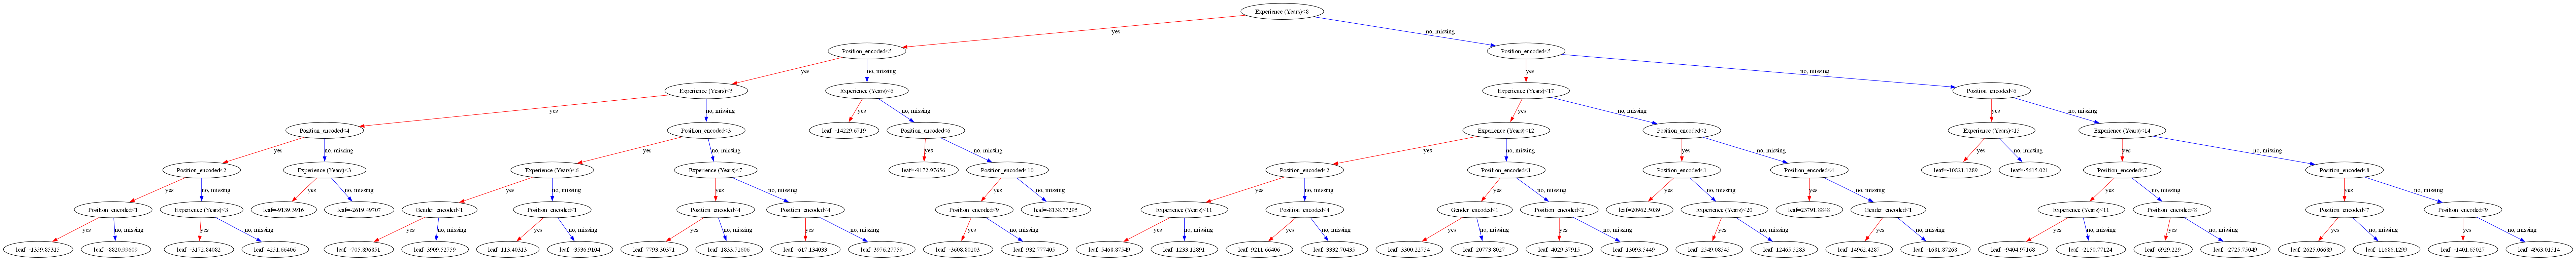

In [16]:
# use plot_tree() method to visualize the tree with num_trees=0
# high resolution
from xgboost import plot_tree
import matplotlib.pyplot as plt

# plot high resolution tree
fig, ax = plt.subplots(figsize=(200, 200))
plot_tree(regressor, num_trees=0, ax=ax)
plt.show()

In [ ]:
# 

# Coding: KNN

In [52]:
# Define the function to calculate Manhattan distance
def manhattan_distance(point1, point2):
    """
    Calculate the Manhattan distance between two points.
    Formula: |x1 - x2| + |y1 - y2|
    Args:
        point1 (tuple): The (x, y) coordinates of the first point.
        point2 (tuple): The (x, y) coordinates of the second point.

    Returns:
        float: The Manhattan distance between the two points.

    """
    return sum(abs(a - b) for a, b in zip(point1, point2))

# Define the function to find the k nearest neighbors based on Manhattan distance
def find_k_nearest_neighbors(data, k, data_point):
    """
    Find the k nearest neighbors of a given data point based on Manhattan distance.

    Args:
        data (list): A list of data points.
        k (int): The number of nearest neighbors to find.
        data_point (list): The data point for which to find the nearest neighbors.
    
    Returns:
        list: The k nearest neighbors of the data point.
    """
    distances = [(point, manhattan_distance(point, data_point)) for point in data]
    
    # Sort the distances by the Manhattan distance value
    distances.sort(key=lambda x: x[1])
    
    # Extract the first k points (the nearest neighbors)
    nearest_neighbors = [list(map(lambda x: round(x, 2), point[0])) for point in distances[:k]]
    
    return nearest_neighbors

# Example usage:
data = [
[0.32, 0.20, 0.10],
[0.13, 0.06, 0.20],
[0.31, 0.19, 0.10],
[0.24, 0.14, 0.06],
[0.21, 0.12, 0.13],
[0.58, 0.43, 0.47],
[0.56, 0.36, 0.73],
[0.49, 0.36, 0.16],
[0.60, 0.44, 0.43],
[0.54, 0.40, 0.31]
]
k = 3
data_point = [0.25, 0.15, 0.10]

# Find k nearest neighbors
nearest_neighbors = find_k_nearest_neighbors(data, k, data_point)
nearest_neighbors


[[0.24, 0.14, 0.06], [0.31, 0.19, 0.1], [0.21, 0.12, 0.13]]

In [54]:
from sklearn.neighbors import KNeighborsClassifier

class Solution:
    def knn_classify(self, train_data, train_labels, test_data, k=2):
        # Initialize the KNeighborsClassifier with the specified number of neighbors
        knn = KNeighborsClassifier(n_neighbors=k)
        
        # Fit the model using the training data and labels
        knn.fit(train_data, train_labels)
        
        # Predict the labels for the test data
        predictions = knn.predict(test_data)
        
        # Return the predicted labels
        return predictions.tolist()

# Example input data
train_data = [
    [0.32, 0.20, 0.10],
    [0.13, 0.06, 0.20],
    [0.31, 0.19, 0.10],
    [0.24, 0.14, 0.06],
    [0.21, 0.12, 0.13],
    [0.58, 0.43, 0.47],
    [0.56, 0.36, 0.73],
    [0.49, 0.36, 0.16],
    [0.60, 0.44, 0.43],
    [0.54, 0.40, 0.31]
]
train_labels = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
test_data = [
    [0.30, 0.15, 0.10],
    [0.55, 0.40, 0.50]
]
k = 2

# Create a Solution object and classify the test data
solution = Solution()
predictions = solution.knn_classify(train_data, train_labels, test_data, k)
predictions


[0, 1]

In [56]:
import numpy as np

class Solution:
    def euclidean_distance(self, x1, x2):
        # Calculate the Euclidean distance between two points
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def cal_distance(self, train_data, centroid_values):
        train_data = np.array(train_data)
        centroid_values = np.array(centroid_values)
        
        # Calculate the distance of each data point from the centroid
        distances = [self.euclidean_distance(data_point, centroid_values) for data_point in train_data]
        
        # Return distances as numpy.float64
        return np.array([np.round(dist, 2) for dist in distances], dtype=np.float64)

# Example input data
train_data = [
    [0.32, 0.20, 0.10],
    [0.13, 0.06, 0.20],
    [0.31, 0.19, 0.10],
    [0.24, 0.14, 0.06],
    [0.21, 0.12, 0.13],
    [0.58, 0.43, 0.47],
    [0.56, 0.36, 0.73],
    [0.49, 0.36, 0.16],
    [0.60, 0.44, 0.43],
    [0.54, 0.40, 0.31]
]

centroid_values = [0.24, 0.14, 0.06]

# Create a Solution object and calculate distances
solution = Solution()
distances = solution.cal_distance(train_data, centroid_values)
distances


array([0.11, 0.2 , 0.09, 0.  , 0.08, 0.61, 0.77, 0.35, 0.6 , 0.47])

In [ ]:
# euclidean_distance using math
import math

def euclidean_distance(point1, point2):
    """
    Calculate the Euclidean distance between two points in n-dimensional space.

    Args:
        point1 (tuple): The coordinates of the first point.
        point2 (tuple): The coordinates of the second point.

    Returns:
        float: The Euclidean distance between the two points.
    """
    # Calculate the squared differences for each dimension
    squared_diff = [(a - b) ** 2 for a, b in zip(point1, point2)]
    # Sum the squared differences and take the square root of the result
    return math.sqrt(sum(squared_diff))

In [ ]:
import numpy as np
import math
from sklearn.cluster import KMeans

class Solution:
    def euclidean_distance(self, x1, x2):
        # Calculate the squared differences for each dimension
        squared_diff = [(a - b) ** 2 for a, b in zip(x1, x2)]
        # Sum the squared differences and take the square root of the result
        return math.sqrt(sum(squared_diff))

    def assign_clusters(self, train_data, centroid_values):
        clusters = []
        for data_point in train_data:
            # Calculate the distance to each centroid
            distances = [self.euclidean_distance(data_point, centroid) for centroid in centroid_values]
            # Assign the data point to the closest centroid (the one with minimum distance)
            cluster = np.argmin(distances)
            clusters.append(int(cluster))
        return clusters
    
    def update_centroids(self, train_data, allocation):
        train_data = np.array(train_data)
        allocation = np.array(allocation)
        
        # Find unique clusters
        unique_clusters = np.unique(allocation)
        
        # Calculate the new centroids
        new_centroids = []
        for cluster in unique_clusters:
            # Get all points that belong to the current cluster
            cluster_points = train_data[allocation == cluster]
            # Calculate the mean of the points in the cluster
            centroid = np.mean(cluster_points, axis=0)
            # Append the centroid to the list
            new_centroids.append(centroid)
        
        # Return the new centroids rounded to 2 decimal places
        return np.round(new_centroids, 2).tolist()

    def find_labels(self, train_data):
        # Define initial cluster centers as the 4th and 7th data points (index 3 and 6)
        init_centroids = [train_data[3], train_data[6]]
        
        # Initialize KMeans with 2 clusters, the defined initial centroids, and n_init=1
        kmeans = KMeans(n_clusters=2, init=np.array(init_centroids), n_init=1, random_state=0)
        
        # Fit the model to the training data
        kmeans.fit(train_data)
        
        # Return the labels assigned to each data point
        return kmeans.labels_.tolist()
    
    def update_centroids(self, train_data, allocation):
        train_data = np.array(train_data)
        allocation = np.array(allocation)
        
        # Find unique clusters
        unique_clusters = np.unique(allocation)
        
        # Calculate the new centroids
        new_centroids = []
        for cluster in unique_clusters:
            # Get all points that belong to the current cluster
            cluster_points = train_data[allocation == cluster]
            # Calculate the mean of the points in the cluster
            centroid = np.mean(cluster_points, axis=0)
            # Append the centroid to the list
            new_centroids.append(centroid)
        
        # Return the new centroids rounded to 2 decimal places
        return np.round(new_centroids, 2).tolist()

